In [166]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

warnings.filterwarnings('ignore')

In [167]:
df = pd.read_csv('country_vaccinations.csv')

In [168]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


Посмотрим на пропущенные значения

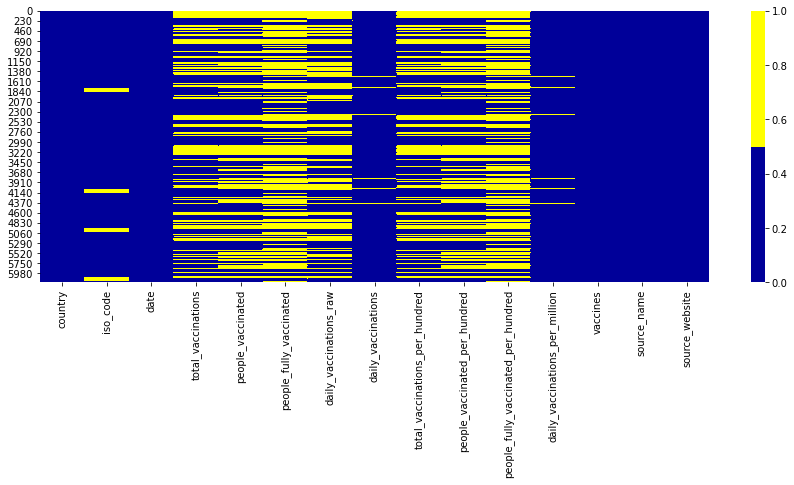

In [169]:
colours = ['#000099', '#ffff00'] 
plt.figure(figsize = (15,5))
sns.heatmap(df.isnull(), cmap = sns.color_palette(colours))
plt.show()

В датасете достаточно много пропущенных значений, для дальнейшей работы заменим их на 0

In [170]:
df.fillna(0, inplace = True)

#### Содержание

Данные содержат следующую информацию:

* Страна - это страна, для которой предоставляется информация о вакцинации;
* ISO Code страны - код ISO для страны;
* Date - дата ввода данных; для некоторых дат у нас есть только ежедневные прививки, для других - только (кумулятивная) общая вакцинация;
* Total number of vaccinations - это абсолютное количество прививок в стране;
* Total number of people vaccinated - человек, в зависимости от схемы иммунизации, получит одну или несколько (обычно 2) вакцины; в определенный момент количество прививок может быть больше, чем количество людей;
* Total number of people fully vaccinated - это количество людей, получивших полный набор прививок в соответствии со схемой иммунизации (обычно 2); в определенный момент времени может быть определенное количество людей, получивших одну вакцину, и другое (меньшее) количество людей, которые получили все вакцины, указанные в схеме;
* Daily vaccinations (raw) - для определенной записи данных количество вакцинаций на эту дату / страну;
* Daily vaccinations - для определенного ввода данных количество прививок на эту дату / страну;
* Total vaccinations per hundred - соотношение (в процентах) между количеством вакцинированных и общей численностью населения на текущий момент в стране;
* Total number of people vaccinated per hundred - соотношение (в процентах) между вакцинированным населением и общей численностью населения на текущий момент в стране;
* Total number of people fully vaccinated per hundred - соотношение (в процентах) между полностью вакцинированным населением и общей численностью населения на текущий момент в стране;
* Number of vaccinations per day - количество ежедневных прививок для этого дня и страны;
* Daily vaccinations per million - соотношение (в промилле) между количеством прививок и общей численностью населения на текущую дату в стране;
* Vaccines used in the country - общее количество вакцин, используемых в стране (на сегодняшний день);
* Source name - источник информации (национальный орган, международная организация, местная организация и т. Д.);
* Source website - сайт источника информации;

Сначала посмотрим, какие вакцины используются в странах.

In [171]:
df_max_total_vac = df.groupby('country').max()

In [172]:
fig = px.choropleth(df_max_total_vac, locations = "iso_code",
                    color = "vaccines", 
                    hover_name = df_max_total_vac.index, 
                    )


fig.update_layout(showlegend = False)
fig.update_layout(title_x = 0.5)

fig.show()

Карта не достаточно информативна. Многие страны использует две и более вакцин одновременно. Посмотрим на каждую вакцину по отдельности. 

In [173]:
df_sputnic = df_max_total_vac.loc[df_max_total_vac['vaccines'].str.contains('Sputnik')]

In [174]:
df_sputnic[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].sort_values(
    by ='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap = 'Blues')

,total_vaccinations,people_vaccinated,people_fully_vaccinated
country,,,
Russia,7639374.000000,5524226.000000,2115148.000000
United Arab Emirates,6516723.000000,3480415.000000,2187849.000000
Mexico,4214294.000000,3604420.000000,609874.000000
Argentina,2294738.000000,1876113.000000,418625.000000
Serbia,1957065.000000,1218309.000000,738756.000000
Hungary,1711969.000000,1319266.000000,392703.000000
Bahrain,534625.000000,322508.000000,212117.000000
Bolivia,137787.000000,127836.000000,9951.000000
Algeria,75000.000000,0.000000,0.000000


In [175]:
fig = px.choropleth(df_sputnic, locations = "iso_code",
                    color = "vaccines", 
                    hover_name = df_sputnic.index, 
                    title = 'Использование вакцины Sputnik V по странам')


fig.update_layout(showlegend = False)
fig.update_layout(title_x = 0.5)

fig.show()

In [176]:
df_astra_zeneca = df_max_total_vac.loc[df_max_total_vac['vaccines'].str.contains('Oxford')]

In [177]:
df_astra_zeneca[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].sort_values(
    by ='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap = 'Blues')

,total_vaccinations,people_vaccinated,people_fully_vaccinated
country,,,
India,29738409.000000,24307635.000000,5430774.000000
United Kingdom,25216857.000000,23684103.000000,1532754.000000
England,21187615.000000,20111189.000000,1076426.000000
Brazil,11362190.000000,8512960.000000,2849230.000000
Germany,8863270.000000,6113484.000000,2749786.000000
France,7058746.000000,4853278.000000,2205468.000000
Italy,6610347.000000,4641551.000000,1968796.000000
United Arab Emirates,6516723.000000,3480415.000000,2187849.000000
Morocco,5682508.000000,4210770.000000,1471738.000000


In [178]:
fig = px.choropleth(df_astra_zeneca, locations="iso_code",
                    color="vaccines", 
                    hover_name=df_astra_zeneca.index, 
                    title='Использование вакцины AstraZeneca по странам')


fig.update_layout(showlegend=False)
fig.update_layout(title_x = 0.5)

fig.show()

In [179]:
df_pfizer = df_max_total_vac.loc[df_max_total_vac['vaccines'].str.contains('Pfiz')]

In [180]:
df_pfizer[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].sort_values(
    by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,total_vaccinations,people_vaccinated,people_fully_vaccinated
country,,,
United States,105703501.000000,68884011.000000,36929777.000000
United Kingdom,25216857.000000,23684103.000000,1532754.000000
England,21187615.000000,20111189.000000,1076426.000000
Israel,9257019.000000,5128212.000000,4128807.000000
Germany,8863270.000000,6113484.000000,2749786.000000
France,7058746.000000,4853278.000000,2205468.000000
Italy,6610347.000000,4641551.000000,1968796.000000
Chile,6581943.000000,4804999.000000,1776944.000000
United Arab Emirates,6516723.000000,3480415.000000,2187849.000000


In [181]:
fig = px.choropleth(df_pfizer, locations="iso_code",
                    color="vaccines", 
                    hover_name=df_pfizer.index, 
                    title='Использование вакцины Pfizer по странам')


fig.update_layout(showlegend=False)
fig.update_layout(title_x = 0.5)

fig.show()

In [182]:
df_sinovac = df_max_total_vac.loc[df_max_total_vac['vaccines'].str.contains('Sino')]

In [183]:
df_sinovac[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].sort_values(
    by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,total_vaccinations,people_vaccinated,people_fully_vaccinated
country,,,
China,52520000.000000,0.000000,0.000000
Brazil,11362190.000000,8512960.000000,2849230.000000
Turkey,10923284.000000,7887544.000000,3035740.000000
Chile,6581943.000000,4804999.000000,1776944.000000
United Arab Emirates,6516723.000000,3480415.000000,2187849.000000
Morocco,5682508.000000,4210770.000000,1471738.000000
Indonesia,5440432.000000,3985596.000000,1454836.000000
Argentina,2294738.000000,1876113.000000,418625.000000
Serbia,1957065.000000,1218309.000000,738756.000000


In [184]:
fig = px.choropleth(df_sinovac, locations="iso_code",
                    color="vaccines", 
                    hover_name=df_sinovac.index, 
                    title='Использование вакцины Sinovac/Sinofarm по странам')


fig.update_layout(showlegend=False)
fig.update_layout(title_x = 0.5)

fig.show()

In [185]:
df_johnson = df_max_total_vac.loc[df_max_total_vac['vaccines'].str.contains('Johnson')]


In [186]:
df_johnson[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].sort_values(
    by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,total_vaccinations,people_vaccinated,people_fully_vaccinated
country,,,
United States,105703501.000000,68884011.000000,36929777.000000
South Africa,145544.000000,145544.000000,145544.000000


In [187]:
fig = px.choropleth(df_johnson, locations="iso_code",
                    color="vaccines", 
                    hover_name=df_johnson.index, 
                    title='Использование вакцины Johnson&Johnson по странам')


fig.update_layout(showlegend=False)
fig.update_layout(title_x = 0.5)

fig.show()

In [188]:
df_moderna = df_max_total_vac.loc[df_max_total_vac['vaccines'].str.contains('Moderna')]

In [189]:
df_moderna[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].sort_values(
    by='total_vaccinations', ascending = False).head(15).style.background_gradient(cmap='Blues')

,total_vaccinations,people_vaccinated,people_fully_vaccinated
country,,,
United States,105703501.000000,68884011.000000,36929777.000000
Israel,9257019.000000,5128212.000000,4128807.000000
Germany,8863270.000000,6113484.000000,2749786.000000
France,7058746.000000,4853278.000000,2205468.000000
Italy,6610347.000000,4641551.000000,1968796.000000
Spain,5352767.000000,3769523.000000,1583244.000000
Poland,4487273.000000,2891753.000000,1595520.000000
Canada,2934007.000000,2340676.000000,593331.000000
Romania,2069143.000000,1374595.000000,694548.000000


In [190]:
fig = px.choropleth(df_moderna, locations="iso_code",
                    color="vaccines", 
                    hover_name=df_moderna.index, 
                    title='Использование вакцины Moderna по странам')


fig.update_layout(showlegend=False)
fig.update_layout(title_x = 0.5)

fig.show()

И так, что можно сказать после краткого взгляда на полученные данные по распределению различных вакцин по странам.

Есть несколько групп государств, сгруппированных по типу используемых вакцин:

1) Американские вакцины Pfizer и Moderna используются в развитых странах: Северной Америке, Европе, Австралии и нефтяных гигантах Ближнего Востока;

2) Российская вакцина Sputnik V используется в развивающихся странах;

3) Вакцины Китайского производства используются собственно в Китае, Океании и странах Южной Америки;

4) Европейская вакцина Oxford/AstraZeneca кроме Европы применяется в Южной Америке, Австралии, Индии и ряде других стран

На мой взгляд, есть 2 объективных причины такого распределения:

* геополитическая;
* ценовая (т.е. стоимость вакцины)

Теперь посмотрим на максимальные показатели по странам на 13.03.2021 года

In [191]:
fig = px.pie(df_max_total_vac, values='people_vaccinated', names=df_max_total_vac.index, 
             title='Количество вакцинированных людей', color = df_max_total_vac.index)

fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.update_layout(title_x = 0.5)

fig.show()

In [192]:
fig = px.pie(df_max_total_vac, values='people_fully_vaccinated', names=df_max_total_vac.index, 
             title='Количество полностью вакцинированных людей', color = df_max_total_vac.index)

fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.update_layout(title_x = 0.5)

fig.show()

Ожидаемо самые большие сегменты "пирога" занимают страны с большим населением, США, Индия, Россия, Бразилия, далее идут страны Европы и т.д. Удивительным образом выделяется Израиль на первых строчках. Скорее всего, там вакцинирована уже бОльшая часть населения. 

В общем плане, на данных графиках можно посмотреть количество людей, вакцинированных в той или иной стране. Однако это не дает понимания о процентном соотношении вакцинированных людей. Посмотрим на эти данные.

Но перед этим хочется взглянуть на данные по стране, которая очевидно должна быть на первых строчках, но ее нет - это Китай.

In [193]:
df.loc[df['country'] == "China"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1190,China,CHN,2020-12-15,1500000.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://global.chinadaily.com.cn/a/202103/03/W...
1191,China,CHN,2020-12-16,0.0,0.0,0.0,0.0,187500.0,0.00,0.0,0.0,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://global.chinadaily.com.cn/a/202103/03/W...
1192,China,CHN,2020-12-17,0.0,0.0,0.0,0.0,187500.0,0.00,0.0,0.0,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://global.chinadaily.com.cn/a/202103/03/W...
1193,China,CHN,2020-12-18,0.0,0.0,0.0,0.0,187500.0,0.00,0.0,0.0,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://global.chinadaily.com.cn/a/202103/03/W...
1194,China,CHN,2020-12-19,0.0,0.0,0.0,0.0,187500.0,0.00,0.0,0.0,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://global.chinadaily.com.cn/a/202103/03/W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,China,CHN,2021-02-24,0.0,0.0,0.0,0.0,631579.0,0.00,0.0,0.0,439.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://global.chinadaily.com.cn/a/202103/03/W...
1262,China,CHN,2021-02-25,0.0,0.0,0.0,0.0,631579.0,0.00,0.0,0.0,439.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://global.chinadaily.com.cn/a/202103/03/W...
1263,China,CHN,2021-02-26,0.0,0.0,0.0,0.0,631579.0,0.00,0.0,0.0,439.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://global.chinadaily.com.cn/a/202103/03/W...
1264,China,CHN,2021-02-27,0.0,0.0,0.0,0.0,631579.0,0.00,0.0,0.0,439.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://global.chinadaily.com.cn/a/202103/03/W...


Из выборки выше понятно, почему Китай не попал в графики. Он предоставляет данные только о количестве проведенных вакцинаций, даже если вакцину получил один и тот же человек в случае вакцинации в два этапа. Кроме того данные получены только по 28-02-2021. Более того, данные о количестве вакцинаций в день явно выглядят странно, точно повторяющимися день ото дня. Возможно они являются синтетическими. Посмотрим для примера датасет США.

In [194]:
df.loc[df['country'] == "United States"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
5957,United States,USA,2020-12-20,556208.0,556208.0,0.0,0.0,0.0,0.17,0.17,0.00,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
5958,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,57909.0,0.18,0.18,0.00,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
5959,United States,USA,2020-12-22,0.0,0.0,0.0,0.0,127432.0,0.00,0.00,0.00,381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
5960,United States,USA,2020-12-23,1008025.0,1008025.0,0.0,0.0,150606.0,0.30,0.30,0.00,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
5961,United States,USA,2020-12-24,0.0,0.0,0.0,0.0,191001.0,0.00,0.00,0.00,571.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,United States,USA,2021-03-09,93692598.0,61088527.0,32102061.0,1602746.0,2151571.0,28.01,18.27,9.60,6433.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
6037,United States,USA,2021-03-10,95721290.0,62451150.0,32904161.0,2028692.0,2168688.0,28.62,18.67,9.84,6485.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
6038,United States,USA,2021-03-11,98203893.0,64071674.0,33863127.0,2482603.0,2233006.0,29.36,19.16,10.13,6677.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
6039,United States,USA,2021-03-12,101128005.0,65965305.0,35000159.0,2924112.0,2302844.0,30.24,19.72,10.47,6886.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


Посмотрим на мировой график роста количества вакцинированных людей и количества ежедневных вакцинаций.

In [195]:
df_sum = df.groupby('date').sum()

In [196]:
fig = px.bar(df_sum, x=df_sum.index, y='people_vaccinated',
             hover_data=['people_fully_vaccinated'], color='people_fully_vaccinated',
             height=400, title='Количество вакцинированных людей')

fig.update_layout(title_x = 0.5)

fig.show()

До настоящего времени происходит рост количества вакцинированных людей

In [197]:
fig = px.bar(df_sum, x=df_sum.index, y='daily_vaccinations',
             hover_data=['people_fully_vaccinated'], color='people_fully_vaccinated',
             height=400, title='Количество ежедневных вакцинаций')

fig.update_layout(title_x = 0.5)

fig.show()

График показывает выравнивание количества ежедневных вакцинаций с начала февраля да начала марта на уровне 6 млн вакцинаций в день. Затем происходит небольшой рост.

Теперь посмотрим страны, где привито наибольшее количество населения.

In [198]:
fig = px.pie(df_max_total_vac, values='people_vaccinated_per_hundred', names=df_max_total_vac.index, 
             title='Количество вакцинированных людей на 100 жителей страны', color = df_max_total_vac.index)

fig.update_traces(textposition='inside', textinfo='percent+label+value')

fig.update_layout(title_x = 0.5)

fig.show()

Из полученного графика мы видим, что Британская Империя никуда не исчезла))) В первую десятку входят Гибралтал,  Джерси, Уэльс, Шотландия, Ирландия, Остров Мэн и т.д. Все страны, входящие во владение Великобритании, показывают высокие и схожие показатели по количеству вакцинированных на 100 жителей. Это может свидетельствовать о серьезном подходе к данному вопросу с точки зрения правительства и населения.

Для дальнейшего анализа уберем из нашей выборки 4 государства в составе Соединённого Короле́вства Великобрита́нии и Се́верной Ирла́ндии. Их данные все равно объеденены в United Kingdom, а так же все заморские территории Великобритании.


In [199]:
df = df[df.country.apply(lambda x : x not in ['Scotland', 'Wales', 'Northern Ireland'
                    , 'England', 'Isle of Man', 'Cayman Islands', 'Falkland Islands'
                    , 'Guernsey', 'Saint Helena', 'Turks and Caicos Islands', 'Gibraltar', 'Jersey'])]

In [200]:
df_max_new = df.groupby('country').max()

In [201]:
df_max_new[['people_vaccinated', 'people_fully_vaccinated', 'people_vaccinated_per_hundred']].sort_values(
    by='people_vaccinated_per_hundred', ascending = False).head(15).style.background_gradient(cmap='Blues')

,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred
country,,,
Seychelles,61070.000000,27036.000000,62.100000
Israel,5128212.000000,4128807.000000,59.250000
United Arab Emirates,3480415.000000,2187849.000000,35.190000
United Kingdom,23684103.000000,1532754.000000,34.890000
Bermuda,17395.000000,10332.000000,27.930000
Anguilla,3929.000000,0.000000,26.190000
Chile,4804999.000000,1776944.000000,25.140000
United States,68884011.000000,36929777.000000,20.600000
Bahrain,322508.000000,212117.000000,18.950000


In [202]:
fig = px.pie(df_max_new, values='daily_vaccinations_per_million', names=df_max_new.index, 
             title='Количество ежедневных вакцинаций на 1 млн жителей', color = df_max_new.index)

fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.update_layout(title_x = 0.5)

fig.show()

Что бы представить уровень вакцинации в мире на сегодняшний день, возьмем количество вакцинированных людей на 100 населения, вычислим квартили по данной метрике и отобразим на карте.

In [203]:
df_max_new.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,121.000000,121.000000,121.000000,121.000000
mean,2.933751e+06,1.786129e+06,6.744093e+05,1.209585e+05,9.083812e+04,9.551653,6.327851,2.437603,3219.380165
std,1.127457e+07,7.029993e+06,3.435708e+06,4.653780e+05,3.146896e+05,15.574176,9.970451,5.836618,4418.073702
min,4.400000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.229400e+04,7.444000e+03,0.000000e+00,0.000000e+00,1.628000e+03,0.750000,0.240000,0.000000,448.000000
50%,1.982060e+05,1.192220e+05,3.348000e+03,1.228100e+04,1.103900e+04,5.150000,3.470000,0.050000,2085.000000
75%,1.068683e+06,6.700410e+05,2.469610e+05,5.100000e+04,3.460200e+04,11.450000,7.980000,3.270000,3315.000000
max,1.057035e+08,6.888401e+07,3.692978e+07,4.575496e+06,2.541597e+06,106.950000,62.100000,47.700000,24415.000000


In [204]:
conditions = [(df_max_new['people_vaccinated_per_hundred'] <= 0.24), 
              (df_max_new['people_vaccinated_per_hundred'] > 0.24) & (
                  df_max_new['people_vaccinated_per_hundred'] <= 3.47),
              (df_max_new['people_vaccinated_per_hundred'] > 3.47) & (
                  df_max_new['people_vaccinated_per_hundred'] <= 7.98),
              (df_max_new['people_vaccinated_per_hundred'] > 7.98) & (
                  df_max_new['people_vaccinated_per_hundred'] <= 50),
             (df_max_new['people_vaccinated_per_hundred'] > 50)]
values = ['Очень низкий','Низкий', 'Средний', 'Высокий', 'Очень высокий']
df_perc = df_max_new
df_perc['vaccination_level'] = np.select(conditions, values)

In [205]:
fig = px.choropleth(df_perc, locations = 'iso_code', color = 'vaccination_level', 
                    featureidkey = 'properties.name', hover_name = df_perc.index,
                    hover_data = ['people_fully_vaccinated_per_hundred', 'total_vaccinations'], 
                    title = 'Уровень вакцинации в мире')
fig.update_layout(title_x = 0.5)
fig.show()